In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [41]:
df=pd.read_csv('vgsales.csv')
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
#Categorical data, cannot find mean or median, and replacing unknown values with mode might give very inaccurate values
#hence, we are replacing the Unknown Publishers with NaN.
for index,row in df.Publisher.iteritems():
    if(row=="N/A" or row=="Unknown"):
        row=np.nan

In [4]:
df.isnull().values.any()

True

In [5]:
#Dropping all NaN values (there are no unknown numeric values. All NaN values come from the categorical data.)
df=df.dropna()
df.isnull().values.any()

False

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
#Genre vs Region                                            
#Platform vs Region
#Platform vs Genre
#Platform vs Genre - grouped bar chart, w/ Global sales  
#Genre vs Year
#Global sales vs Year
#Individual regions Sales vs Year
#Global Sales for each Publisher vs Year - use this to predict sales in future for each company, calculate growth rate(??), compare
#Sales in each for each Publisher vs Year - use this to predict sales in each in future for each company, calculate growth rate(??), compare
#Publisher vs Genre
#Platform vs Year

In [8]:
#number of unique Platforms
l=df.Platform.unique()
print(type(l))
len(l)

<class 'numpy.ndarray'>


31

In [9]:
#Number of Unique Genres
list=df.Genre.unique()
len(list)

12

Text(0,0.5,'Sales')

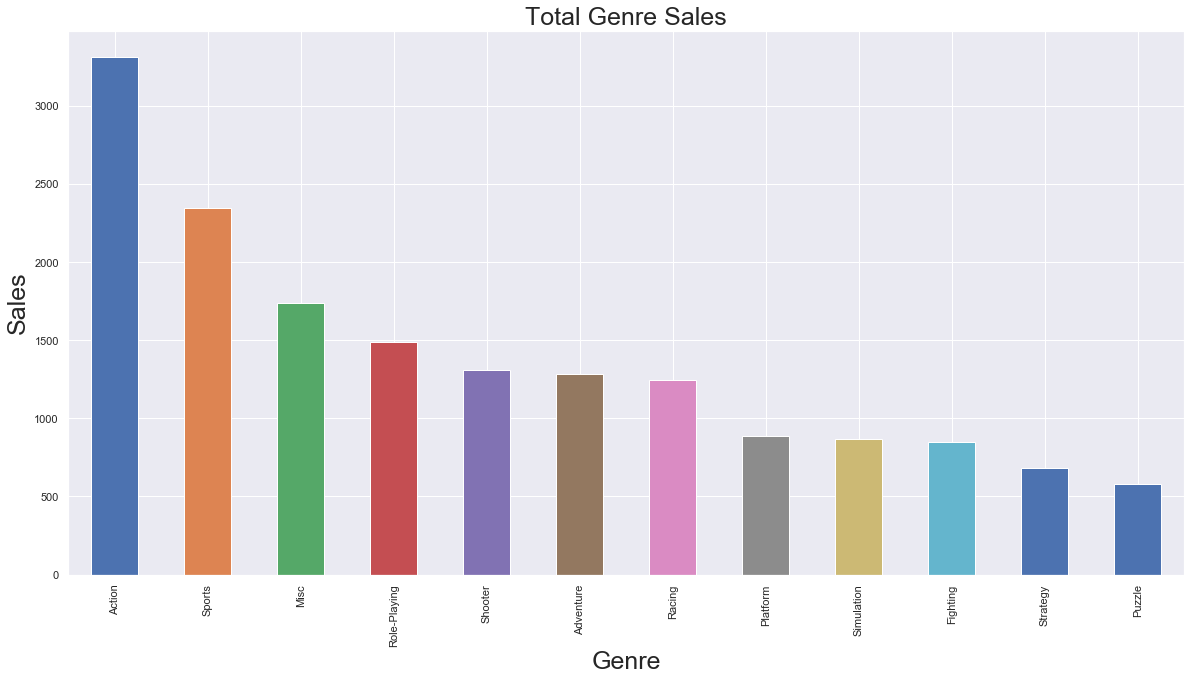

In [54]:
#Frequency plot for Genre - to find the most popular Genre
x = df['Genre'].value_counts().plot(kind='bar')
x.set_title('Total Genre Sales',size = 25)
x.set_xlabel('Genre',size=25)
x.set_ylabel('Sales',size=25)

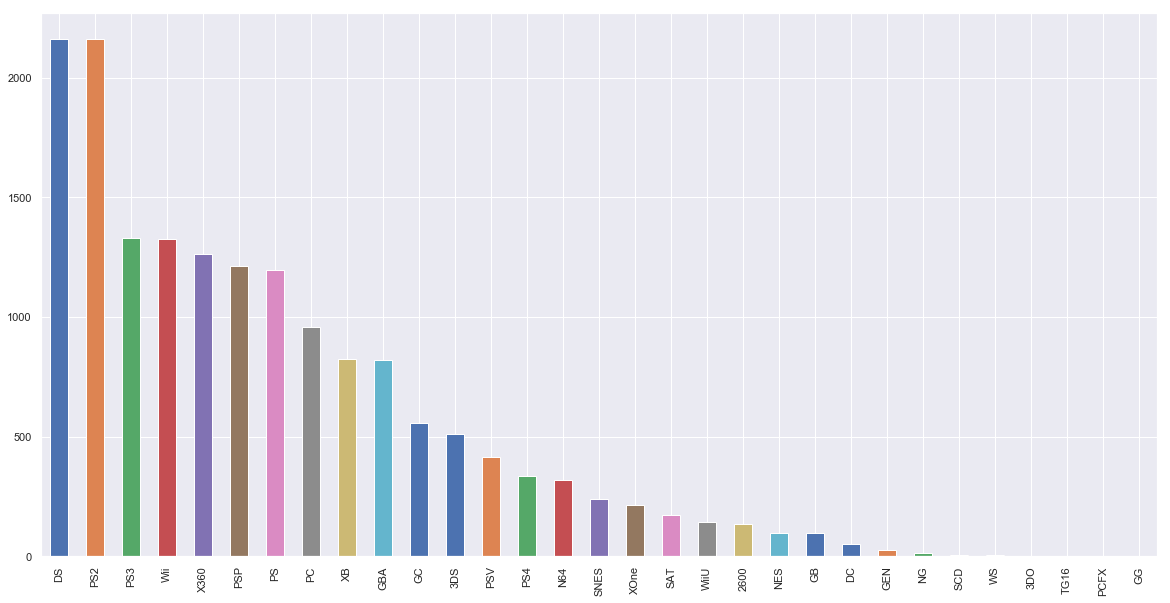

In [51]:
#Frequency plot for Genre - to find the most popular Genre
df['Platform'].value_counts().plot(kind='bar')

Text(0,0.5,'Total Sales')

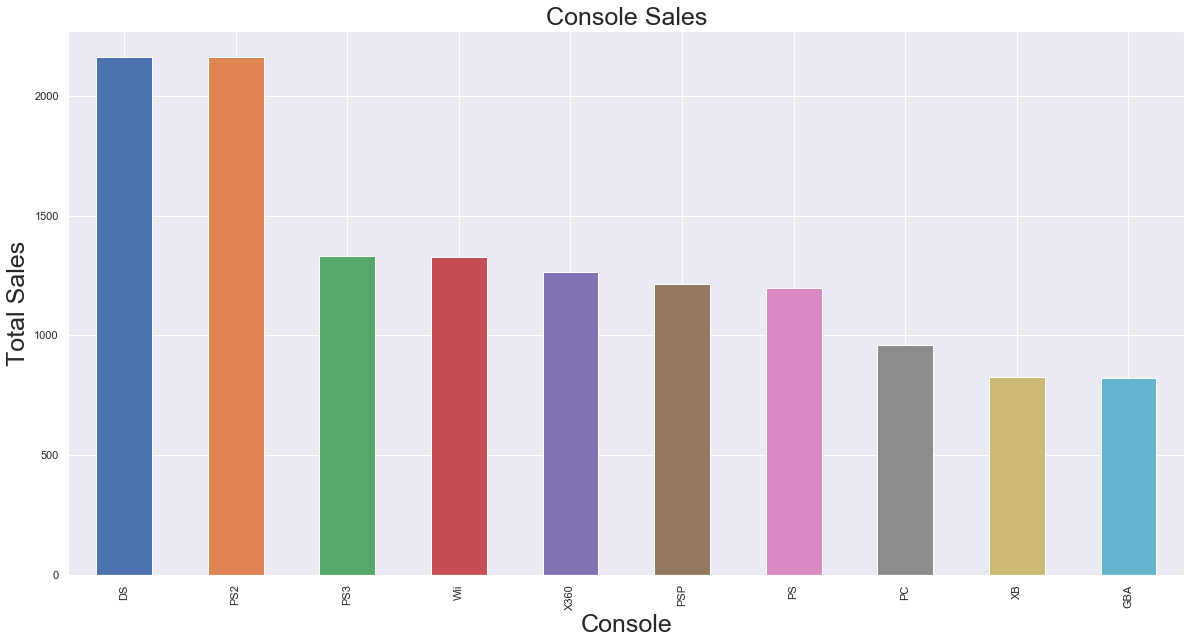

In [68]:
t = df['Platform'].value_counts(sort=True)[:10].plot(kind='bar')
t.set_title("Console Sales",size=25)
t.set_xlabel("Console",size=25)
t.set_ylabel("Total Sales",size=25)

In [13]:
multi_plat = df.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 7) else None}).dropna()
multi_plat.Name = multi_plat.Name.astype(np.int64)
multi_plat = multi_plat.sort_values(['Name'], ascending=False)
multi_plat.columns = ['Platform_count']
multi_plat

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Platform_count
Name,
Need for Speed: Most Wanted,12
FIFA 14,9
Ratatouille,9
LEGO Marvel Super Heroes,9
Angry Birds Star Wars,8
Madden NFL 07,8
Terraria,8
Monopoly,8
Madden NFL 08,8


Text(0,0.5,'Sales')

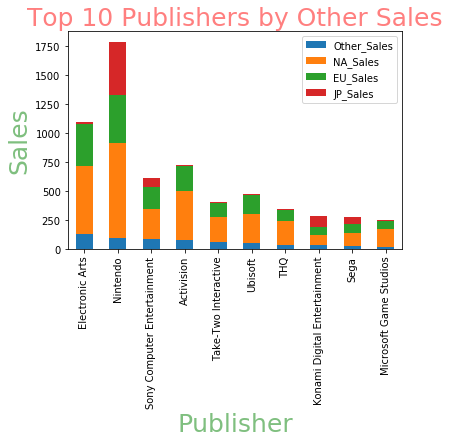

In [14]:
global_pub = df.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['Other_Sales','NA_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Other Sales', size=25, color='red', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

Text(0,0.5,'Sales')

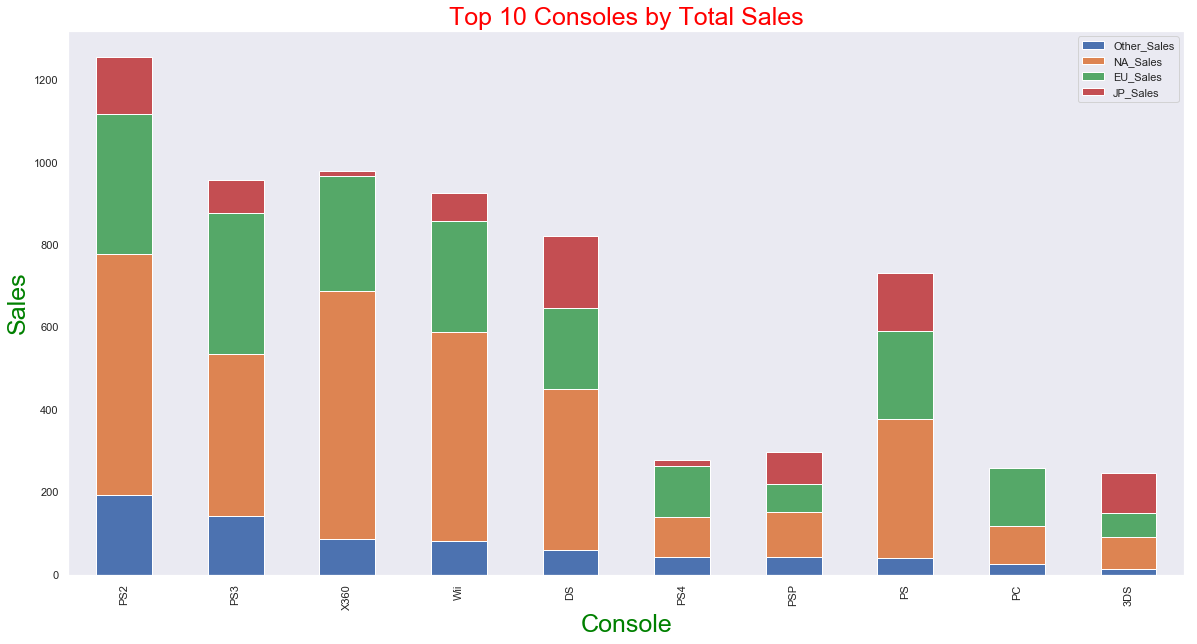

In [66]:
global_pub = df.pivot_table(index=['Platform'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['Other_Sales','NA_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Consoles by Total Sales', size=25, color='red', alpha=1)
ax.set_xlabel('Console', size=25, color='green', alpha=1)
ax.set_ylabel('Sales', size=25, color='green', alpha=1)

Text(0,0.5,'Number of sales')

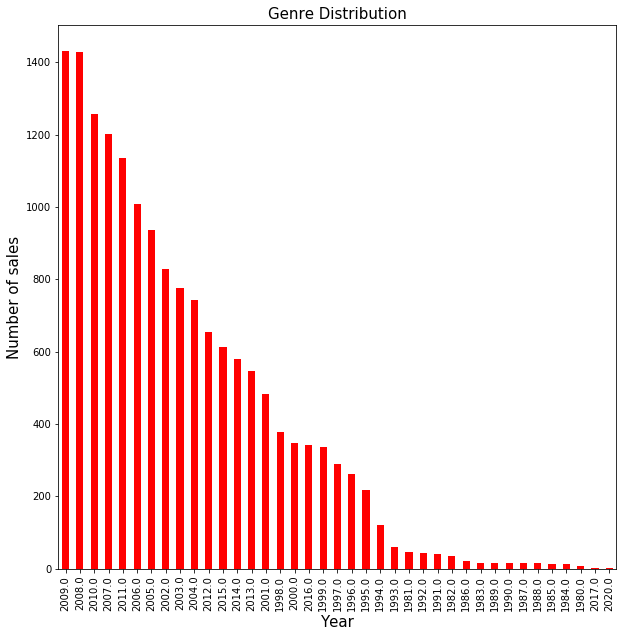

In [16]:
row,col = plt.subplots(figsize=(10,10))
df['Year'].value_counts(sort=True).plot(kind='bar',color = 'red')
plt.title('Genre Distribution',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of sales',fontsize=15)

In [17]:
print('hello')

hello


In [48]:
multi_plat = df.groupby('Year').agg({'Year':lambda x : len(x) if (len(x) > 7) else None}).dropna()
multi_plat.Year = multi_plat.Year.astype(np.int64)
multi_plat = multi_plat.sort_values(['Year'], ascending=False)
multi_plat.columns = ['Genre']
multi_plat

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Genre
Year,
2009.0,1431
2008.0,1428
2010.0,1259
2007.0,1202
2011.0,1139
2006.0,1008
2005.0,941
2002.0,829
2003.0,775


C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Sales')

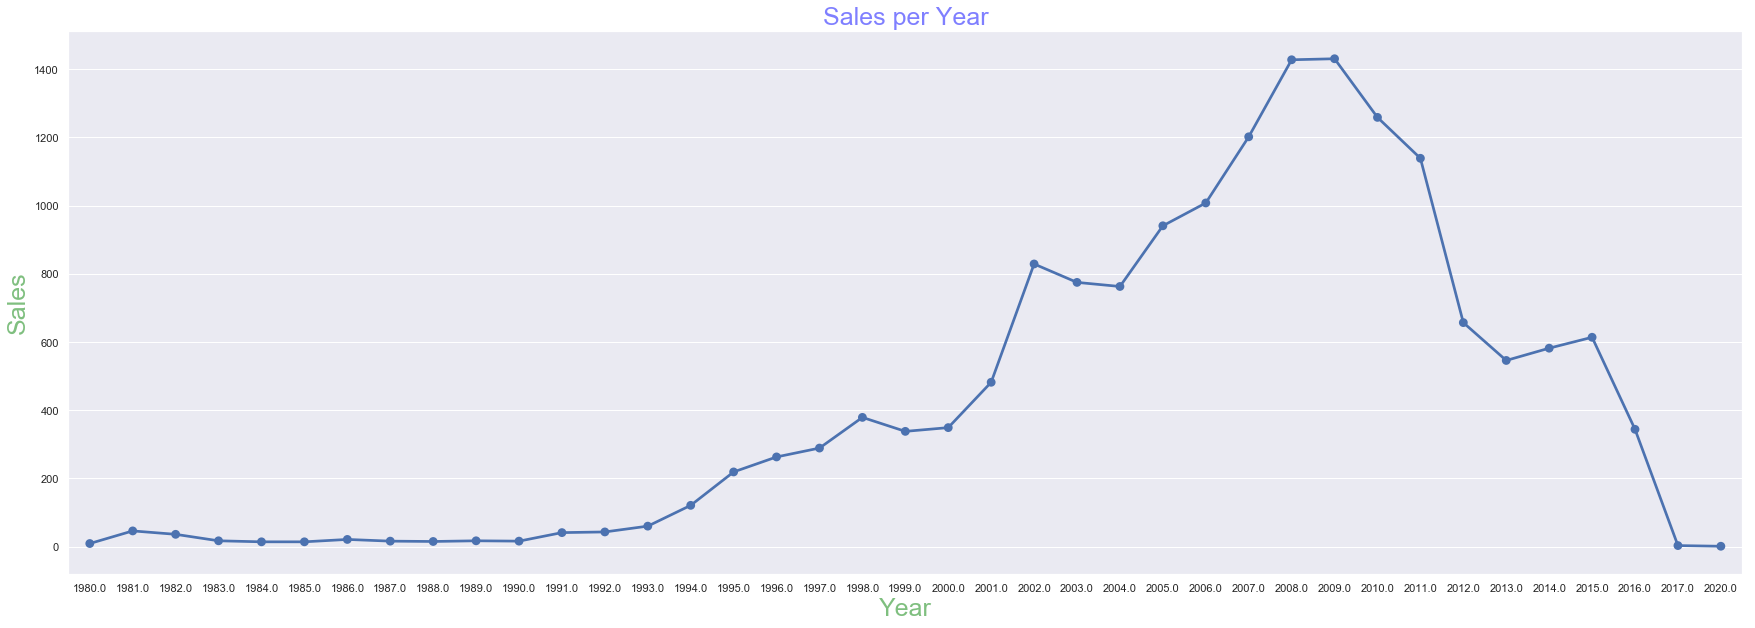

In [44]:
genre_by_year = df.groupby('Year').agg({'Year':len}).sort_values('Year')
plt.subplots(figsize=(30,10))
ax = sb.pointplot(x=genre_by_year.index, y=genre_by_year.Year)
ax.set_title('Sales per Year', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Year', color='green', size=25, alpha=0.5)
ax.set_ylabel('Sales', color='green', size=25, alpha=0.5)

Text(0,0.5,'Year')

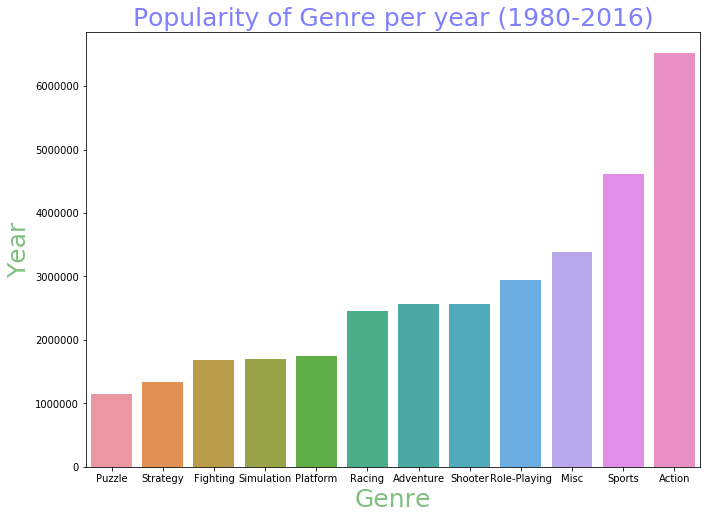

In [20]:
global_sales_by_genre = df.groupby('Genre').agg({'Year':np.sum}).sort_values('Year')
plt.subplots(figsize=(11,8))
ax = sb.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Year)
ax.set_title('Popularity of Genre per year (1980-2016)', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='green', size=25, alpha=0.5)
ax.set_ylabel('Year', color='green', size=25, alpha=0.5)

Text(0,0.5,'Sales')

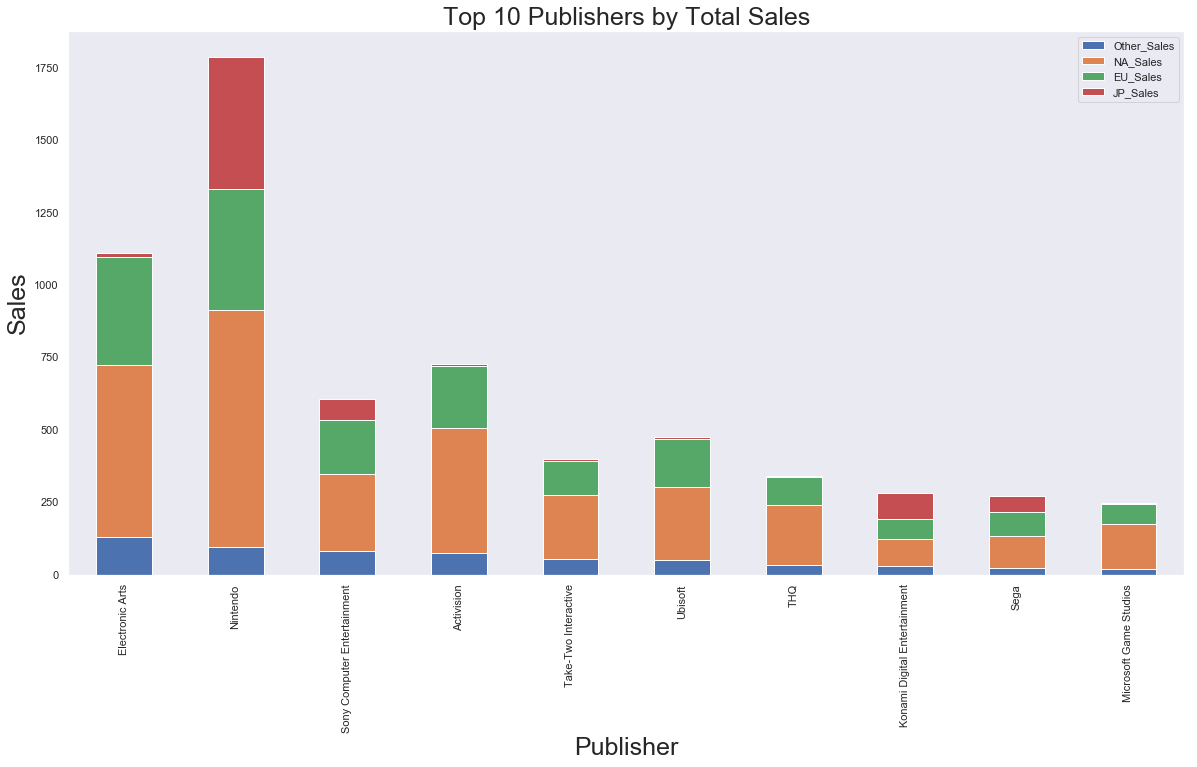

In [63]:
global_pub = df.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['Other_Sales','NA_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Total Sales', size=25)
ax.set_xlabel('Publisher', size=25)
ax.set_ylabel('Sales', size=25,)

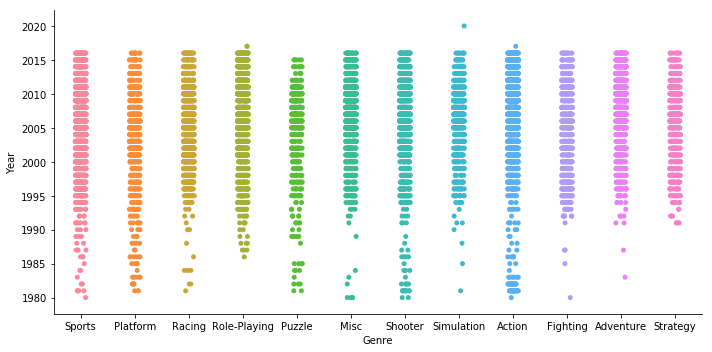

In [22]:
sb.catplot(x="Genre", y="Year", data=df, height=5, aspect=2)


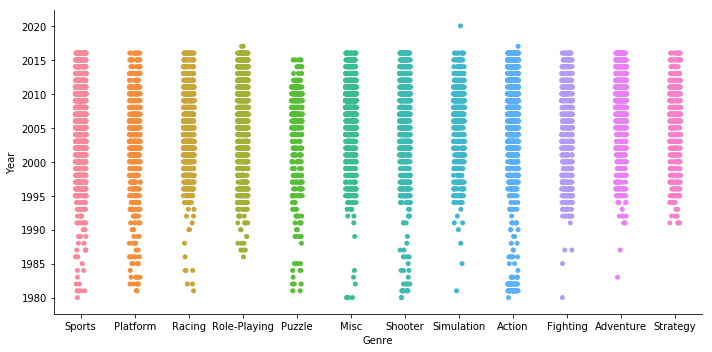

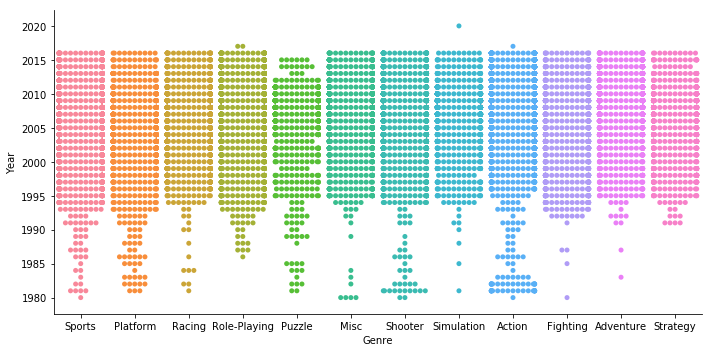

In [23]:
sb.catplot(x="Genre", y="Year", data=df, height=5, aspect=2)
sb.catplot(x="Genre", y="Year", kind="swarm", data=df, height=5, aspect=2)

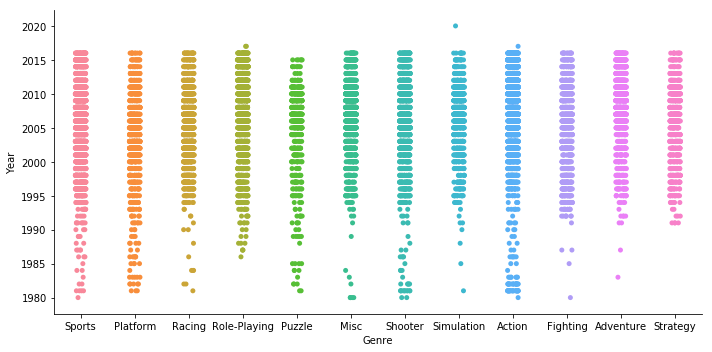

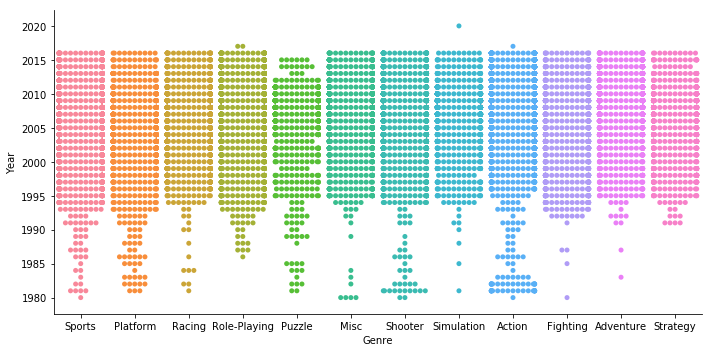

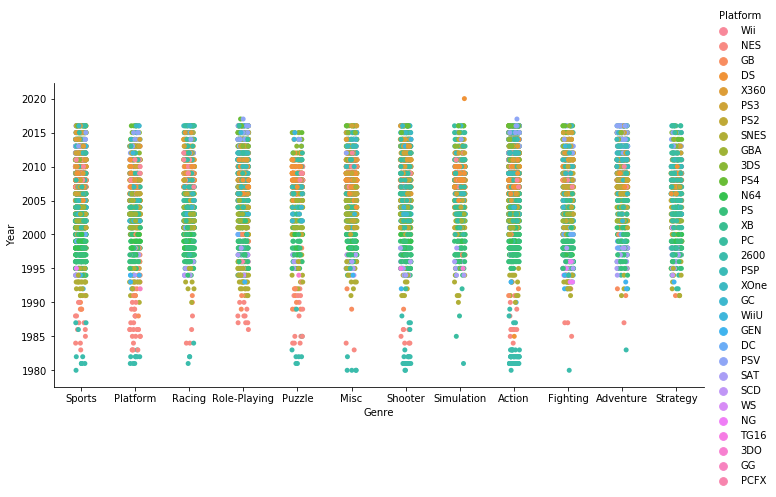

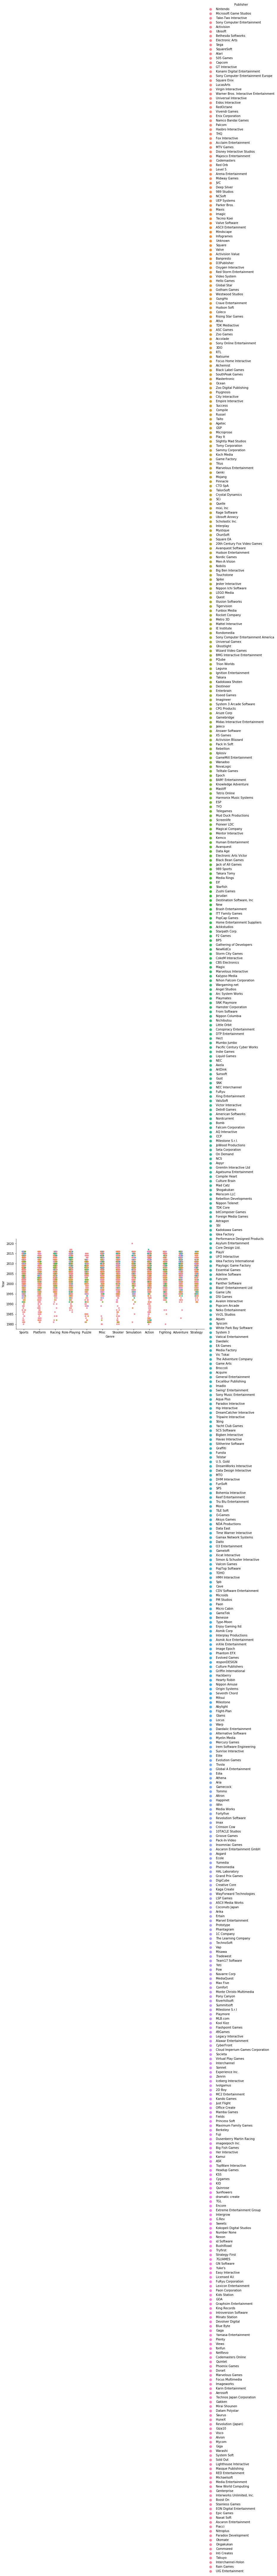

In [24]:
sb.catplot(x="Genre", y="Year", data=df, height=5, aspect=2)
sb.catplot(x="Genre", y="Year", kind="swarm", data=df, height=5, aspect=2)
sb.catplot(x="Genre", y="Year", hue="Platform", data=df, height=5, aspect=2)
sb.catplot(x="Genre", y="Year", hue="Publisher", data=df, height=5, aspect=2)


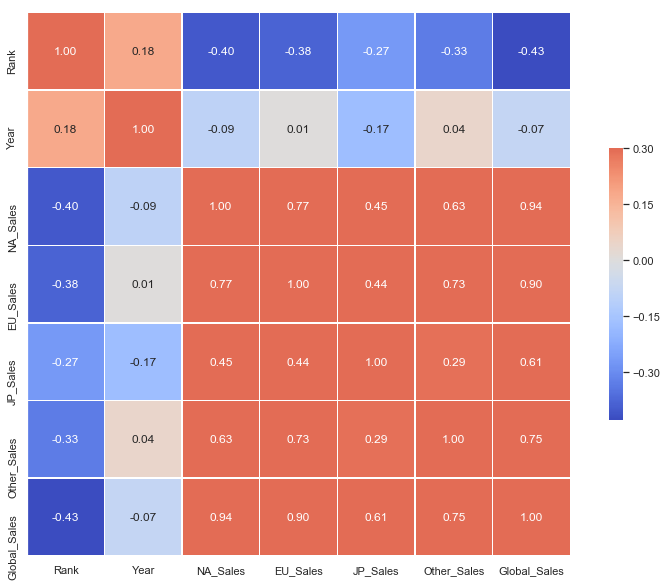

In [117]:
corr = df.corr()
g = sb.heatmap(corr,  vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sb.despine()
g.figure.set_size_inches(14,10)
   
plt.show()

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


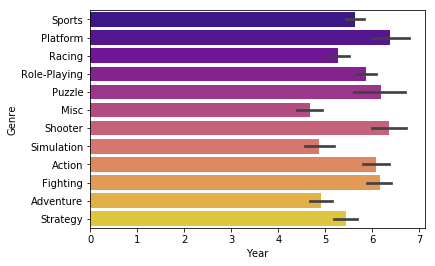

In [26]:
sb.barplot(x ='Year', y ='Genre', data = df,  
           palette ='plasma', estimator = np.std) 

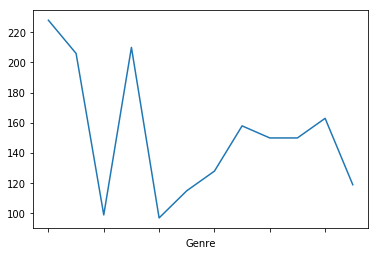

In [27]:
types = df.groupby('Genre')['Publisher'].nunique().plot()

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


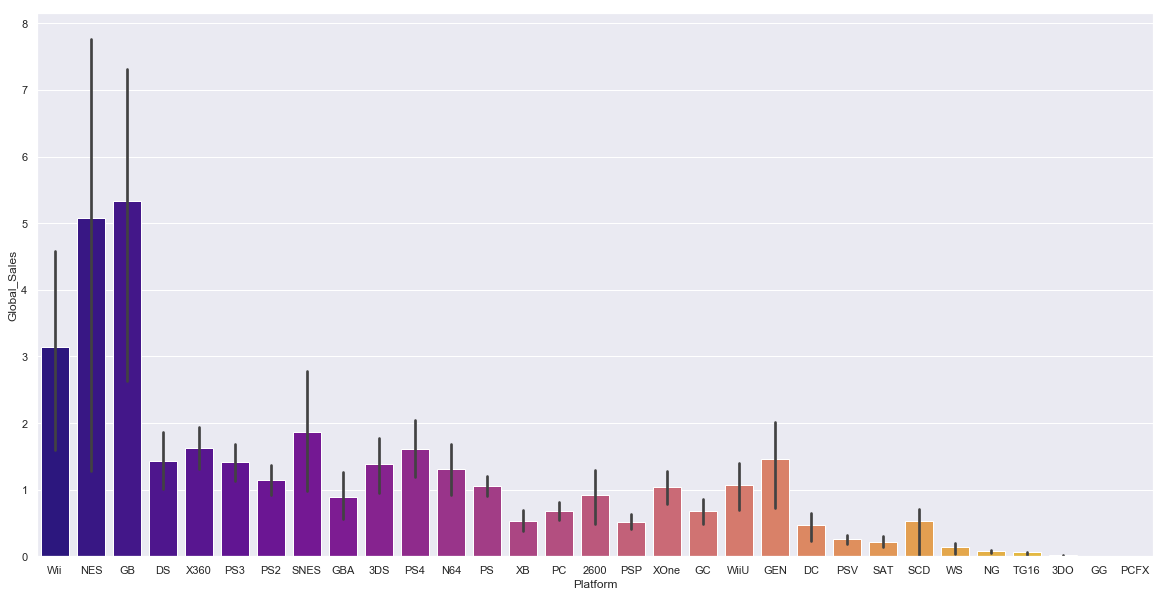

In [61]:
#platform v NA Sales
sb.set(rc={'figure.figsize':(20,10)})
sb.barplot(x ='Platform', y ='Global_Sales', data = df,  
           palette ='plasma', estimator = np.std)


In [113]:
df.Publisher.value_counts (dropna=True) 
df.Year.value_counts (dropna=True) 

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [30]:
#predicting sales in the future using regression and RMSE
from sklearn.linear_model import LinearRegression
import statsmodels as stat

In [31]:
len(df)

16291

In [32]:
split_point = len(df)- 1792
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False) #contains approx 11% of total.

Dataset 14499, Validation 1792


In [33]:
X = dataset["NA_Sales"]
y= dataset["Global_Sales"]
X = np.array(X)
X.reshape(-1,1)

array([[4.149e+01],
       [2.908e+01],
       [1.585e+01],
       ...,
       [0.000e+00],
       [2.000e-02],
       [0.000e+00]])

In [34]:
##to measure performance
from sklearn.metrics import mean_squared_error
from math import sqrt
model = LinearRegression() 
model.fit(X,y)
model.predict(validation["NA_Sales"])
#test = ...
#predictions = ...
#mse = mean_squared_error(test, predictions)
#rmse = sqrt(mse)
#print('RMSE: %.3f' % rmse)

ValueError: Expected 2D array, got 1D array instead:
array=[4.149e+01 2.908e+01 1.585e+01 ... 0.000e+00 2.000e-02 0.000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# prepare data
X = df.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

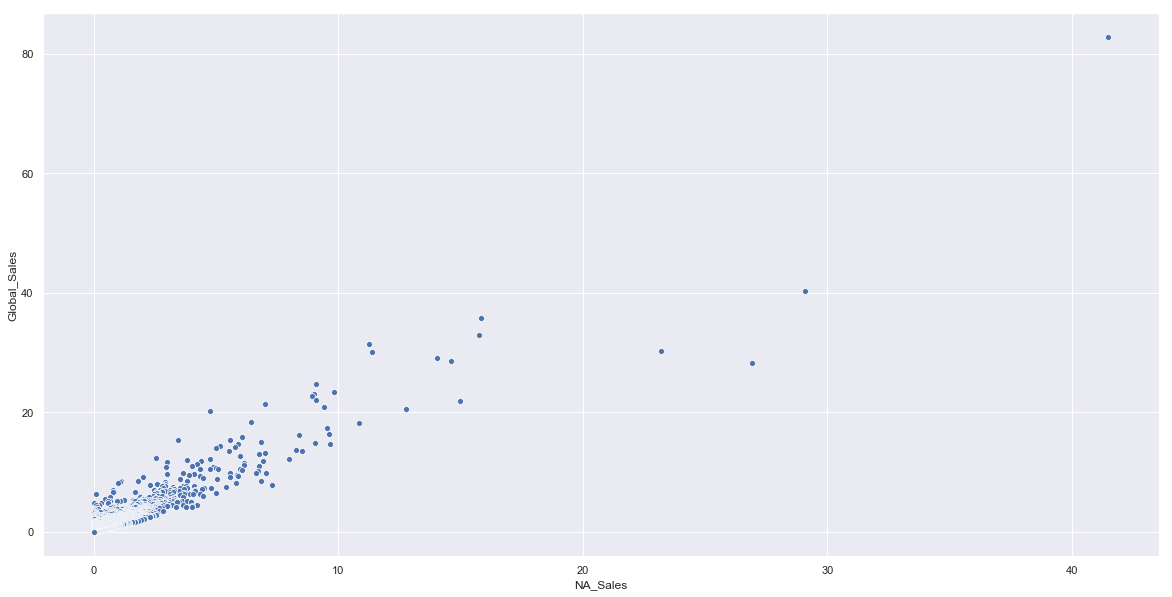

In [35]:
sb.scatterplot(df["NA_Sales"],df["Global_Sales"])

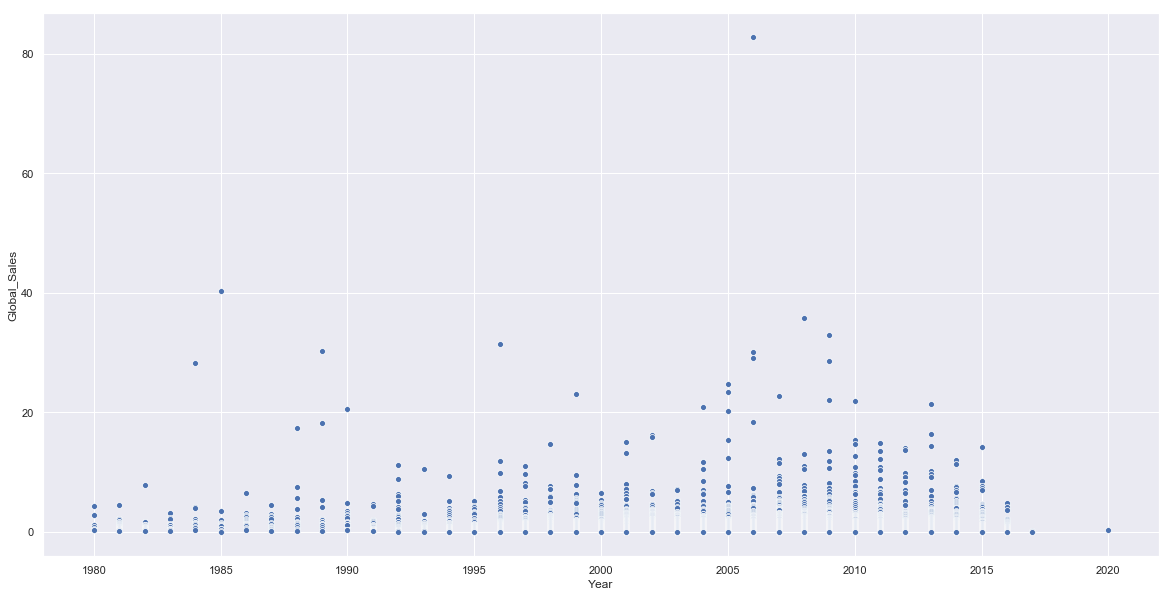

In [36]:
sb.scatterplot(df["Year"],df["Global_Sales"])

In [42]:
#for chi square test


In [43]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


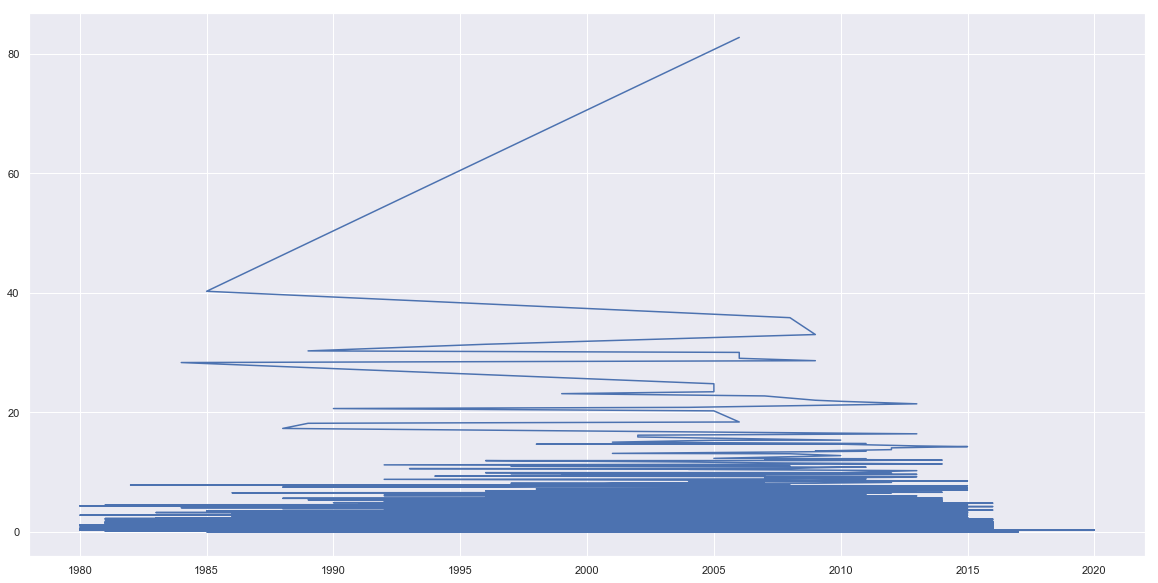

In [46]:
plt.plot(df.Year,df.Global_Sales)

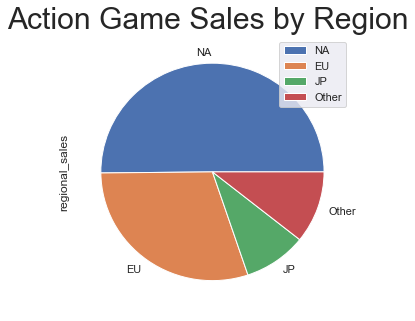

In [58]:
act = df.loc[df['Genre']=="Action"]
na_sales_sum=act['NA_Sales'].sum()
eu_sales_sum=act['EU_Sales'].sum()
jp_sales_sum=act['JP_Sales'].sum()
other_sales_sum=act['Other_Sales'].sum()
total_sales_sum=act['Global_Sales'].sum()
type(na_sales_sum)
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales', figsize=(5, 5))
plt.figtext(.5,.9,"Action Game Sales by Region", fontsize=30, ha='center')
plt.show()

Text(0,0.5,'Platform')

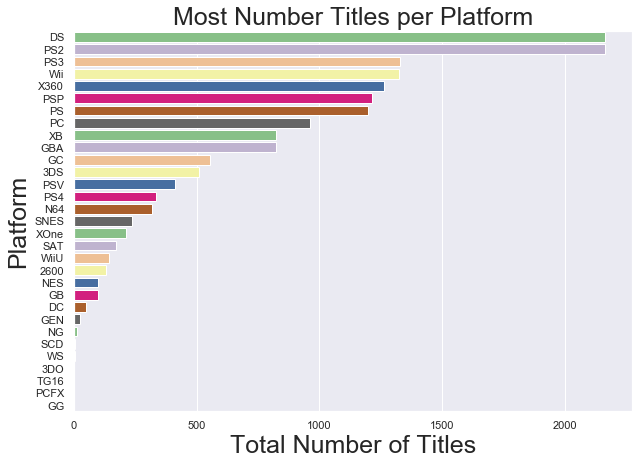

In [60]:
platform_title = df.Platform.value_counts(sort=True)
plt.subplots(figsize=(10,7))
ax = sb.barplot(x=platform_title , y=platform_title .index, palette='Accent')
ax.set_title('Most Number Titles per Platform',size=25)
ax.set_xlabel('Total Number of Titles',size=25)
ax.set_ylabel('Platform',size=25)

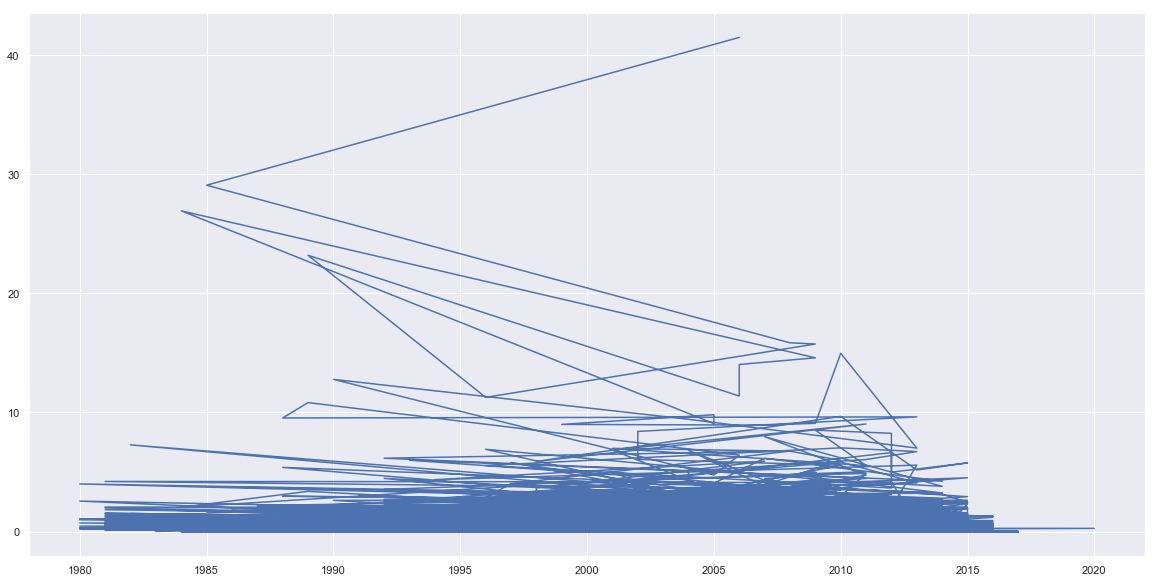

In [85]:
from pylab import *

sony = df.loc[df['Publisher']=="Sony Computer Entertainment"]
total_sales_sony = sony['Global_Sales']

plt.plot(df.Year,df.NA_Sales)
#plot(df.Global_Sales,df.EU_Sales)
#plot(df.Global_Sales,df.JP_Sales)
#plot(df.Global_Sales,df.Other_Sales)


In [121]:
from scipy.stats import pearsonr

sony = df.loc[df['Publisher']=="Sony Computer Entertainment"]
#x = np.array(df['NA_Sales'])
y = np.array(df['Global_Sales'])

print('Regression value',pearsonr(sony,y))
plt.scatter(sony,y)
b1, b0 = np.polyfit(sony,y,1)
y_pred = b0 + b1 * x  #gets predicted values
plt.plot(sony,y_pred,color='red')
plt.title("Sony Sales vs Global Sales",size=25)
plt.xlabel("Sony Sales",size=25)
plt.ylabel("Global Sales",size=25)
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [132]:
df2=df.drop(df.index[[0,1,2]])

Regression value (0.9221999990896327, 0.0)


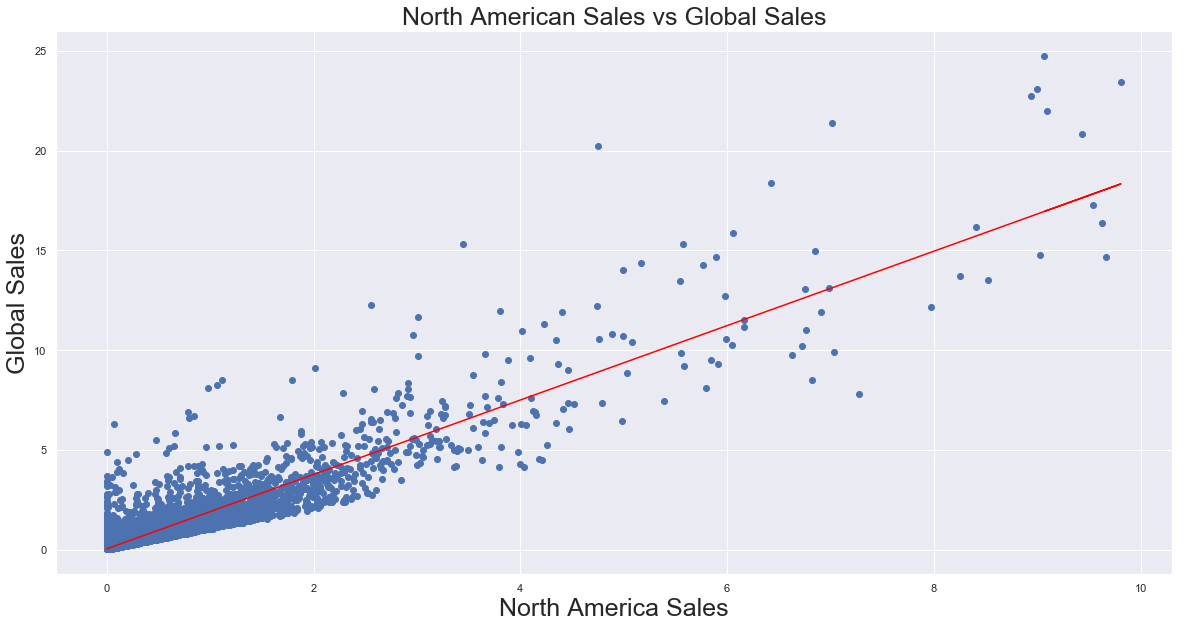

In [154]:
from scipy.stats import pearsonr
df_filtered = df[df['NA_Sales'] <= 10]
x = np.array(df_filtered['NA_Sales'])
y = np.array(df_filtered['Global_Sales'])

X = x

print('Regression value',pearsonr(X,y))
plt.scatter(X,y)
b1, b0 = np.polyfit(X,y,1)
y_pred = b0 + b1 * X  #gets predicted values
plt.plot(X,y_pred,color='red')
plt.title("North American Sales vs Global Sales",size=25)
plt.xlabel("North America Sales",size=25)
plt.ylabel("Global Sales",size=25)
plt.show()

In [146]:
X = np.abs(np.log(x))
X

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([2.75684037, 2.42214433, 3.14415228, ...,        inf,        inf,
       4.60517019])

Regression value (0.8706804707264933, 0.0)


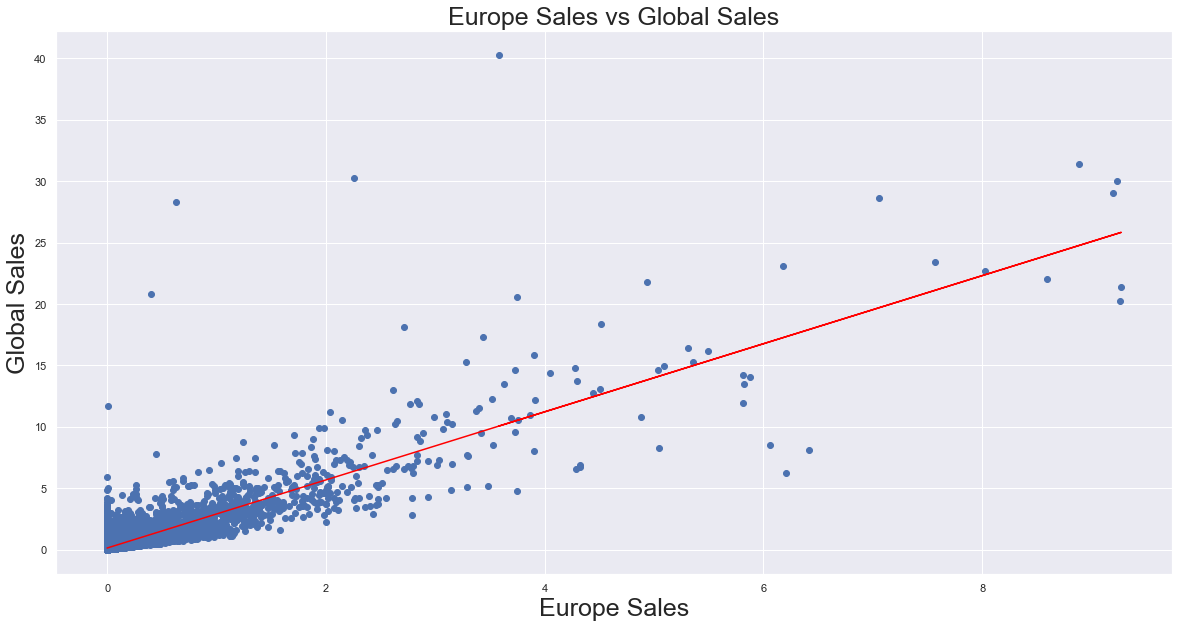

In [155]:
from scipy.stats import pearsonr
df_filtered = df[df['EU_Sales'] <= 10]
x = np.array(df_filtered['EU_Sales'])
y = np.array(df_filtered['Global_Sales'])

X = x

print('Regression value',pearsonr(X,y))
plt.scatter(X,y)
b1, b0 = np.polyfit(X,y,1)
y_pred = b0 + b1 * X  #gets predicted values
plt.plot(X,y_pred,color='red')
plt.title("Europe Sales vs Global Sales",size=25)
plt.xlabel("Europe Sales",size=25)
plt.ylabel("Global Sales",size=25)
plt.show()

Regression value (0.5992835114405439, 0.0)


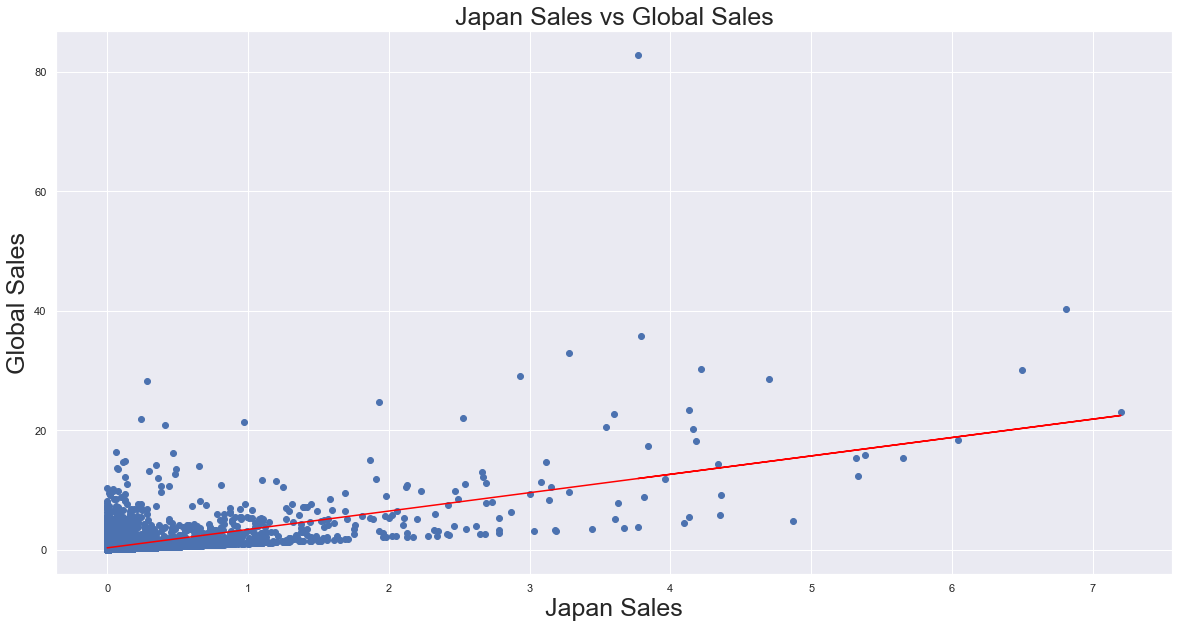

In [156]:
from scipy.stats import pearsonr
df_filtered = df[df['JP_Sales'] <= 10]
x = np.array(df_filtered['JP_Sales'])
y = np.array(df_filtered['Global_Sales'])

X = x

print('Regression value',pearsonr(X,y))
plt.scatter(X,y)
b1, b0 = np.polyfit(X,y,1)
y_pred = b0 + b1 * X  #gets predicted values
plt.plot(X,y_pred,color='red')
plt.title("Japan Sales vs Global Sales",size=25)
plt.xlabel("Japan Sales",size=25)
plt.ylabel("Global Sales",size=25)
plt.show()

Regression value (0.6118155181564977, 0.0)


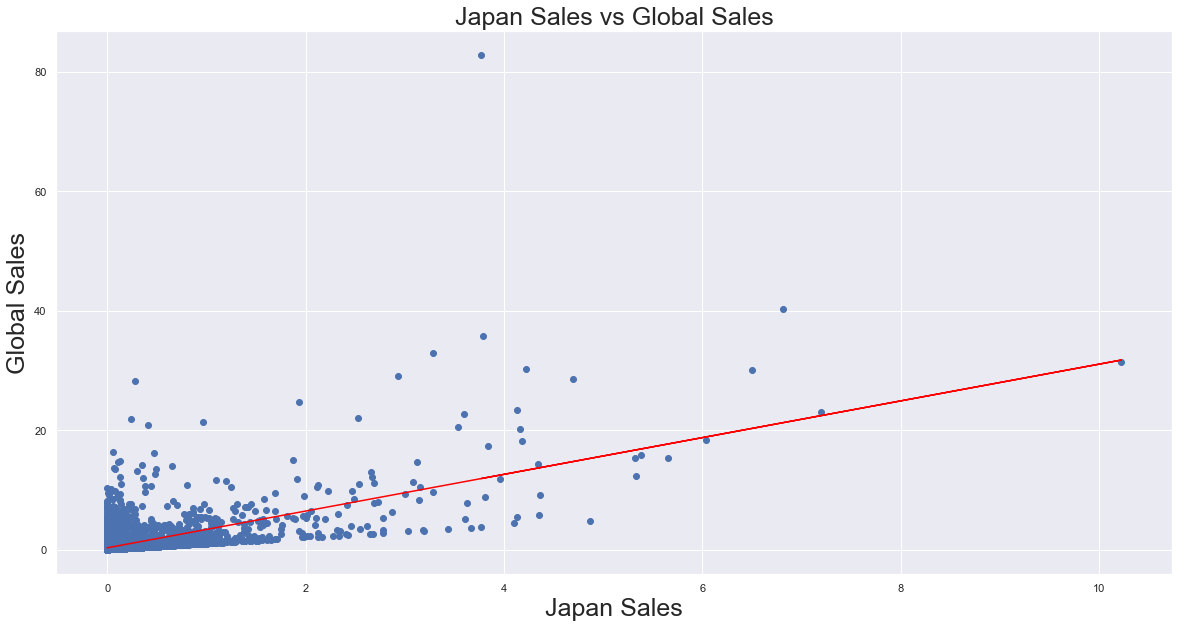

In [97]:
from scipy.stats import pearsonr
x = np.array(df['JP_Sales'])
y = np.array(df['Global_Sales'])

#not a good fit 
print('Regression value',pearsonr(x,y))
plt.scatter(x,y)
b1, b0 = np.polyfit(x,y,1)
y_pred = b0 + b1 * x  #gets predicted values
plt.plot(x,y_pred,color='red')
plt.title("Japan Sales vs Global Sales",size=25)
plt.xlabel("Japan Sales",size=25)
plt.ylabel("Global Sales",size=25)
plt.show()


Regression value (0.7483308464077957, 0.0)


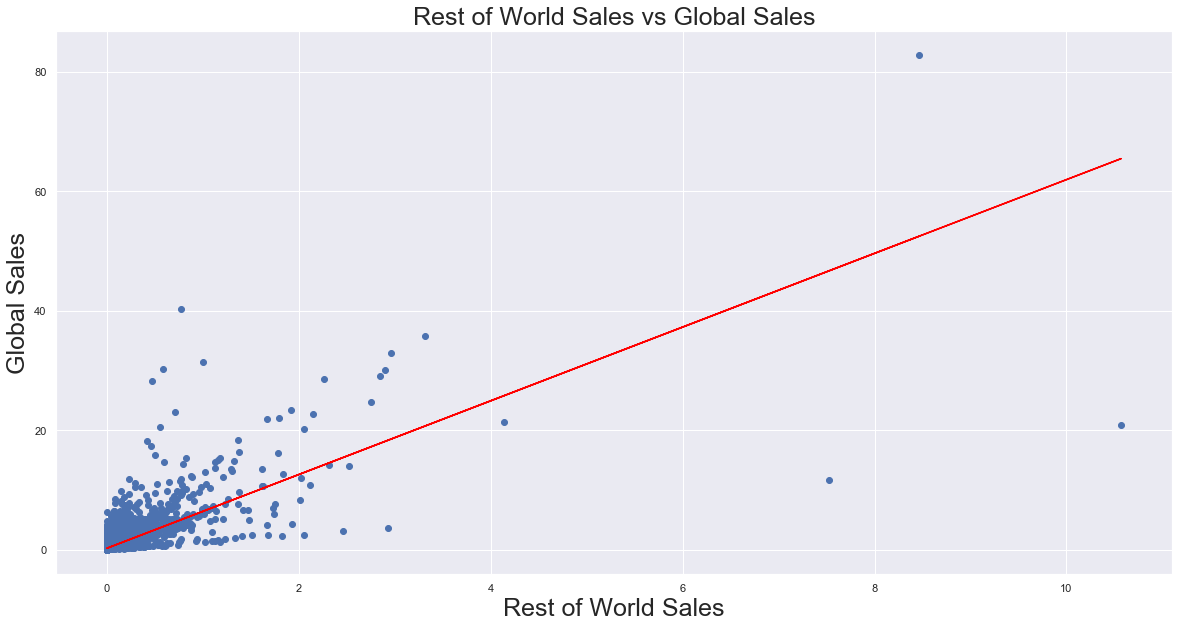

In [158]:
from scipy.stats import pearsonr
x = np.array(df['Other_Sales'])
y = np.array(df['Global_Sales'])

#not a good fit 
print('Regression value',pearsonr(x,y))
plt.scatter(x,y)
b1, b0 = np.polyfit(x,y,1)
y_pred = b0 + b1 * x  #gets predicted values
plt.plot(x,y_pred,color='red')
plt.title("Rest of World Sales vs Global Sales",size=25)
plt.xlabel("Rest of World Sales",size=25)
plt.ylabel("Global Sales",size=25)
plt.show()


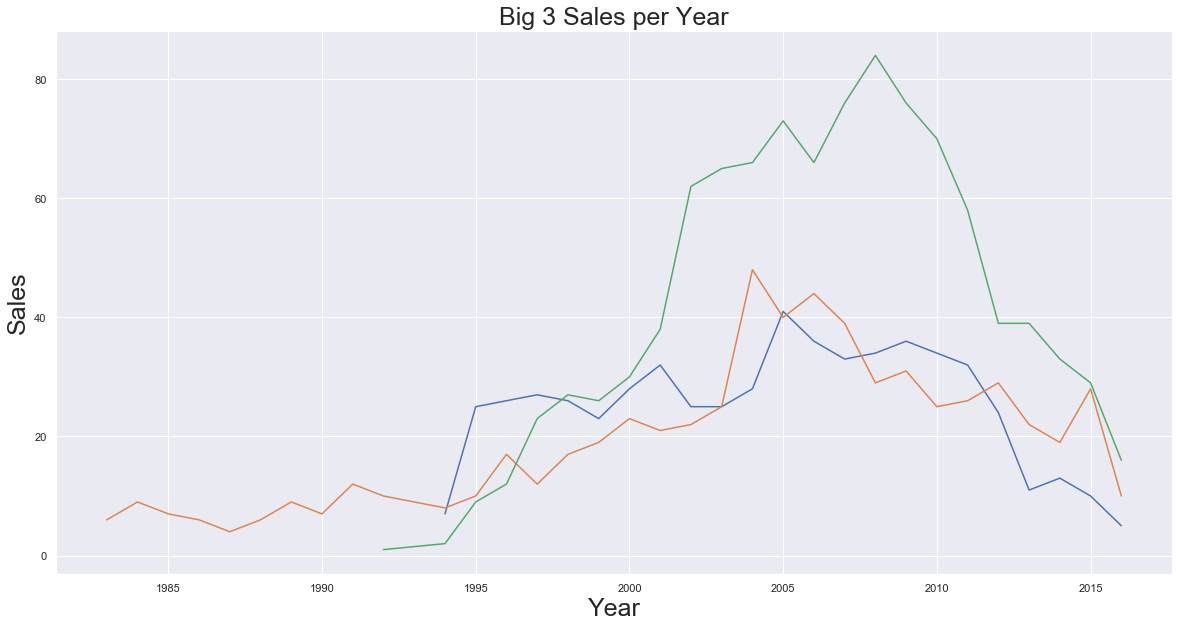

In [120]:
ea=df.loc[df['Publisher']=="Electronic Arts"]
na_sales_sum=ea['NA_Sales'].sum()
eu_sales_sum=ea['EU_Sales'].sum()
jp_sales_sum=ea['JP_Sales'].sum()
other_sales_sum=ea['Other_Sales'].sum()
total_sales_sum=ea['Global_Sales'].sum()

nin=df.loc[df['Publisher']=="Nintendo"]
na_sales_sum=nin['NA_Sales'].sum()
eu_sales_sum=nin['EU_Sales'].sum()
jp_sales_sum=nin['JP_Sales'].sum()
other_sales_sum=nin['Other_Sales'].sum()
total_sales_sum=nin['Global_Sales'].sum()

son=df.loc[df['Publisher']=="Sony Computer Entertainment"]
na_sales_sum=son['NA_Sales'].sum()
eu_sales_sum=son['EU_Sales'].sum()
jp_sales_sum=son['JP_Sales'].sum()
other_sales_sum=son['Other_Sales'].sum()
total_sales_sum=son['Global_Sales'].sum()

plt.show()
plt.xlabel('Year',size=25)
plt.ylabel('Sales',size=25)
plt.title("Big 3 Sales per Year",size=25)
sales_per_year = son.groupby('Year')['Global_Sales'].nunique().plot(kind='line')
sales_per_year = nin.groupby('Year')['Global_Sales'].nunique().plot(kind='line')
sales_per_year = ea.groupby('Year')['Global_Sales'].nunique().plot(kind='line')



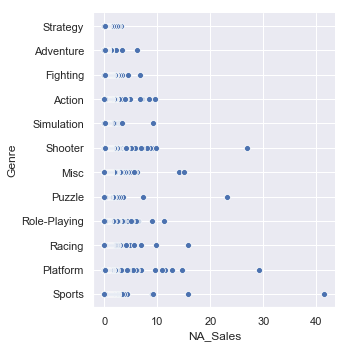

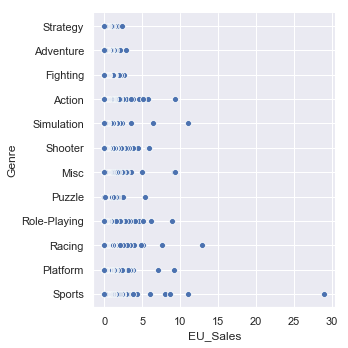

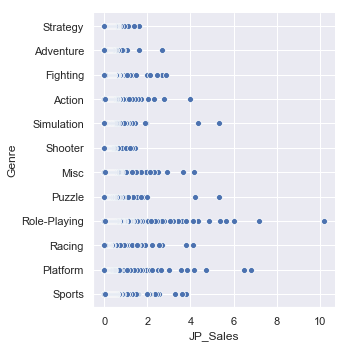

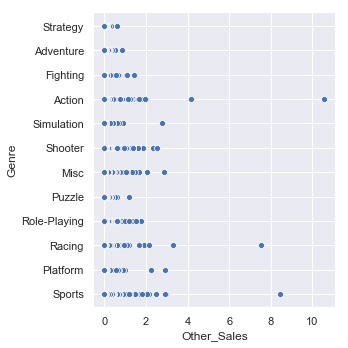

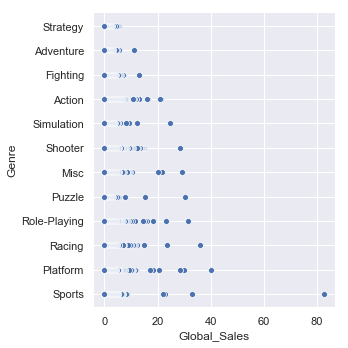

In [115]:
sb.relplot(x="NA_Sales", y="Genre", data=df);
#plt.savefig('NA_Sales.png')
sb.relplot(x="EU_Sales", y="Genre", data=df);
#plt.savefig('EU_Sales.png')
sb.relplot(x="JP_Sales", y="Genre", data=df);
sb.relplot(x="Other_Sales", y="Genre", data=df);
#plt.savefig('Other_Sales.png')
sb.relplot(x="Global_Sales", y="Genre", data=df);
#plt.savefig('Global_Sales.png')